#### Question

#### Load Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("ex2data.csv")
print(len(df))
df.head()

217


Exam_1     Exam_2  Admission Status
0  76.098787  87.420570                 1
1  55.482161  35.570703                 0
2  82.368754  40.618255                 0
3  34.212061  44.209529                 0
4  16.647000  53.874000                 1

#### Train and Test set

In [23]:
train_count = int(0.8*len(df))
df_train = df[0:train_count]
df_test = df[train_count:]

#### Convert Features to Numpy Array

In [24]:
x1 = df_train['Exam_1'].to_numpy()
x2 = df_train['Exam_2'].to_numpy()
y_train = df_train['Admission Status'].to_numpy()
x_train = np.array([x1,x2])
y_train = np.array([y_train])

#### Prediction Function

In [25]:
def predict_y(w,x_train,b):
    y_pred = np.zeros((1,m))
    z = np.dot(w,x_train) + b
    sig_z = np.divide(1, (1 + np.exp(-z)))
    
    for i in range(0,m):
        if (sig_z[0,i] >= 0.5):
            y_pred[0,i] = 1
        else:
            y_pred[0,i] = 0
                
    return y_pred

In [26]:
w = np.array([[0.0,0.3]])
b  = -10
m = len(x1)
y_pred = predict_y(w,x_train,b)
print(f"y = {y_train}") 
print("\n")
print(f"y_pred = {y_pred}") 

y = [[1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
  0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
  1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1
  1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
  1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0]]


y_pred = [[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1.]]


#### Cost Function

In [27]:
def calculate_cost(y, y_pred):
     y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Clip y_pred to avoid log(0) and log(1)
     j = (1/m) * ( - np.dot(y, np.log(y_pred).T) - np.dot((1-y), np.log(1-y_pred).T) )
     cost = j[0,0]
     return cost

In [28]:
m = len(x1)
cost = calculate_cost(y_train,y_pred)
print(f"cost = {cost}")

cost = 15.5726689887365


#### Calculate Gradient

In [29]:
def calculate_grdaient(y_train,y_pred):
    m = len(x1)
    diff = np.subtract(y_pred,y_train)
    dj_dw = (1/m) * np.dot(diff,x_train.T)
    dj_db = (1/m) * np.sum(diff)
    return dj_dw, dj_db

In [30]:
dj_dw, dj_db = calculate_grdaient(y_train,y_pred)
print(f"dj_dw : {dj_dw}")
print(f"dj_db : {dj_db}")

dj_dw : [[11.82276088 19.07630039]]
dj_db : 0.23121387283236994


#### Optimise Weights

In [31]:
def optimise_weights(w,x_train,b,alpha,iter):
    dj_dw = np.zeros((1,2))
    dj_db = 0
    w_all = np.zeros((iter,2))
    b_all = np.zeros(iter)
    cost_all = np.zeros(iter)
    
    for i in range(0,iter):
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        y_pred = predict_y(w,x_train,b)
        j = calculate_cost(y_train, y_pred)
        dj_dw, dj_db = calculate_grdaient(y_train,y_pred)
        print(f"Iteration : {i}, w = {w}, b = {b:.4f}, Cost = {j:.4f}")
        w_all[i,] = w
        b_all[i] = b
        cost_all[i] = j
        
    return w_all,b_all,cost_all

In [32]:
w = np.array([0.1,0.02])
x_train = np.array([x1,x2])
b  = -7
alpha = 0.001
iter = 150
w_all,b_all,cost_all = optimise_weights(w,x_train,b,alpha,iter)

Iteration : 0, w = [[0.1  0.02]], b = -7.0000, Cost = 15.9718
Iteration : 1, w = [[0.09620972 0.02667715]], b = -6.9999, Cost = 15.9718
Iteration : 2, w = [[0.09132184 0.0309879 ]], b = -6.9998, Cost = 15.3729
Iteration : 3, w = [[0.08692393 0.03512103]], b = -6.9997, Cost = 15.3729
Iteration : 4, w = [[0.08194167 0.03837778]], b = -6.9996, Cost = 15.3729
Iteration : 5, w = [[0.07783967 0.04181216]], b = -6.9995, Cost = 14.9736
Iteration : 6, w = [[0.07455228 0.04563322]], b = -6.9994, Cost = 14.5743
Iteration : 7, w = [[0.07198349 0.04821408]], b = -6.9993, Cost = 14.1750
Iteration : 8, w = [[0.07031677 0.05110305]], b = -6.9992, Cost = 14.3746
Iteration : 9, w = [[0.0677301  0.05287087]], b = -6.9991, Cost = 13.9753
Iteration : 10, w = [[0.06605884 0.05498907]], b = -6.9989, Cost = 13.5760
Iteration : 11, w = [[0.06470989 0.05671007]], b = -6.9988, Cost = 13.3764
Iteration : 12, w = [[0.06388003 0.05855065]], b = -6.9987, Cost = 13.9753
Iteration : 13, w = [[0.06234236 0.05908442]], 

In [33]:
min_value = np.min(cost_all) # Finding the minimum value
min_index = np.argmin(cost_all) # Finding the position (index) of the minimum value
cost = cost_all[min_index]
w = w_all[min_index]
b = b_all[min_index]
print(f"Optimize value of w = {w}, b = {b}, with Cost = {cost} at iteration : {min_index}")

Optimize value of w = [0.0600921  0.06064809], b = -6.9983872832369975, with Cost = 13.17674470062179 at iteration : 15


#### Loss Function

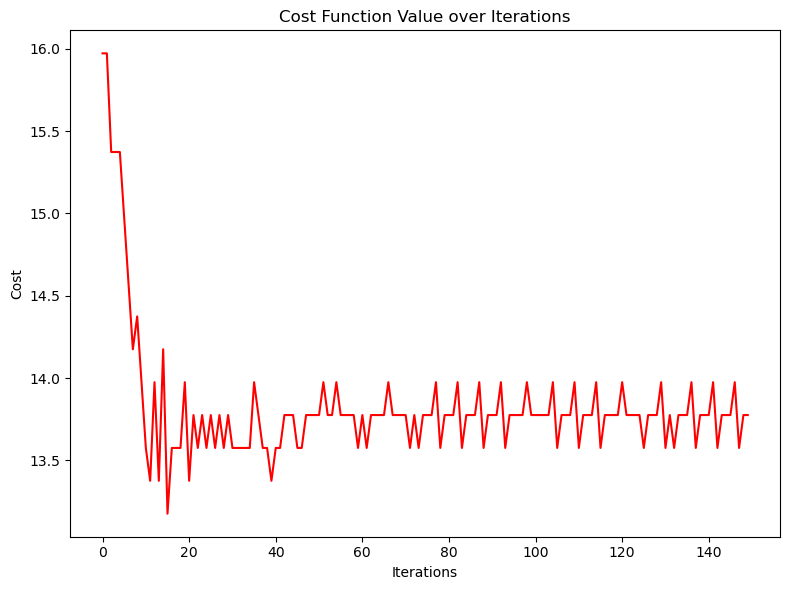

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the weight values over iterations
plt.figure(figsize=(8, 6))

# Plot for cost_all
plt.plot(cost_all, color='red')
#plt.plot(cost_all, color='red')
plt.title('Cost Function Value over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

#### Calculate Metric for Train Data

In [35]:
print(f"y : {y_train}")
print(f"y_pred : {y_pred}")

y : [[1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1
  0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1
  1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1
  1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
  1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0]]
y_pred : [[1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
  0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1.]]


In [36]:
def Calculate_Metric(y_pred,y_train):
    TP = TN = FP = FN = 0
    
    for i in range(0,m):
        if y_pred[0,i] == y_train[0,i] == 1:
            TP = TP + 1
        if y_pred[0,i] == y_train[0,i] == 0:
            TN = TN + 1
        if y_pred[0,i] == 1 and y_train[0,i] == 0:
            FP = FP + 1
        if y_pred[0,i] == 0 and y_train[0,i] == 1:
            FN = FN + 1

    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    Recall = TP / (TP + FN)
    Precission = TP / (TP + FP)
    F1_Score = 2 * (Precission*Recall)/(Precission+Recall)
    
    return TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score


TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score = Calculate_Metric(y_pred,y_train)
print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")
print(f"Accuracy : {Accuracy}")
print(f"Recall : {Recall}")
print(f"Precission : {Precission}")
print(f"F1 Score : {F1_Score}")

True Positive : 80
True Negative : 15
False Positive : 59
False Negative : 19
Accuracy : 0.5491329479768786
Recall : 0.8080808080808081
Precission : 0.5755395683453237
F1 Score : 0.6722689075630253


#### Calculate Metric for Test Data 

In [37]:
x1 = df_test['Exam_1'].to_numpy()
x2 = df_test['Exam_2'].to_numpy()
y_test = df_test['Admission Status'].to_numpy()
x_test = np.array([x1,x2])
m = len(x1)
y_test = np.array([y_test])

In [38]:
def predict_y(w,x_test,b):
    y_pred = np.zeros((1,m))
    w =np.array([w])
    z = np.dot(w,x_test) + b
    sig_z = np.divide(1, (1 + np.exp(-z)))
    
    for i in range(0,m):
        if (sig_z[0,i] >= 0.5):
            y_pred[0,i] = 1
        else:
            y_pred[0,i] = 0
                
    return y_pred

In [39]:
y_pred = predict_y(w,x_test,b)
y_pred

array([[1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
        0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.]])

In [40]:
def Calculate_Metric(y_pred,y_test):
    TP = TN = FP = FN = 0
    
    for i in range(0,m):
        if y_pred[0,i] == y_test[0,i] == 1:
            TP = TP + 1
        if y_pred[0,i] == y_test[0,i] == 0:
            TN = TN + 1
        if y_pred[0,i] == 1 and y_test[0,i] == 0:
            FP = FP + 1
        if y_pred[0,i] == 0 and y_test[0,i] == 1:
            FN = FN + 1

    Accuracy = (TP + TN)/(TP + TN + FP + FN)
    Recall = TP / (TP + FN)
    Precission = TP / (TP + FP)
    F1_Score = 2 * (Precission*Recall)/(Precission+Recall)
    
    return TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score


TP,TN,FP,FN,Accuracy,Recall,Precission,F1_Score = Calculate_Metric(y_pred,y_train)
print(f"True Positive : {TP}")
print(f"True Negative : {TN}")
print(f"False Positive : {FP}")
print(f"False Negative : {FN}")
print(f"Accuracy : {Accuracy}")
print(f"Recall : {Recall}")
print(f"Precission : {Precission}")
print(f"F1 Score : {F1_Score}")

True Positive : 11
True Negative : 15
False Positive : 7
False Negative : 11
Accuracy : 0.5909090909090909
Recall : 0.5
Precission : 0.6111111111111112
F1 Score : 0.55
